In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df1=pd.read_csv("corr_data_25_pca.csv")
df1

,is_baseline_formation,PC1,PC2,PC3,PC4,cycles_to_50_pct,cycles_to_60_pct,cycles_to_70_pct,cycles_to_80_pct
0,1,-45.178593,2.615312,-3.127394,1.173349,451,430,387,346
1,1,-86.141742,1.217216,8.338003,-4.413646,449,402,362,325
2,1,-101.705921,4.589749,8.690123,-0.047218,434,397,348,314
3,1,6.233037,-7.484548,5.366633,9.097132,490,478,409,377
4,1,-96.063895,-1.443335,-3.593523,7.010609,414,397,357,327
5,1,-77.832825,1.968099,-10.165862,2.438302,428,404,374,344
6,1,-155.746920,7.852800,-4.437900,-4.076082,386,352,324,300
7,1,-128.333370,7.757368,0.038880,6.946190,402,383,341,306
8,1,-88.186576,2.868841,3.892584,1.197254,434,404,359,326
9,1,-143.426197,3.252197,3.412410,-8.604825,408,350,326,300


In [7]:
df2=pd.read_csv("more_corr_data_25_pca.csv")
df2

,is_baseline_formation,PC1,PC2,PC3,PC4,cycles_to_50_pct,cycles_to_60_pct,cycles_to_70_pct,cycles_to_80_pct
0,0,192.613031,9.348077,4.855122,3.691802,624,590,517,458
1,0,75.530657,8.529429,-7.571432,2.186970,560,512,550,412
2,0,36.307151,8.203337,-2.842000,2.152025,412,468,402,279
3,1,-132.622789,-2.076941,-4.040552,0.902875,446,378,393,312
4,1,-86.141742,1.217216,8.338003,-4.413646,449,402,362,325
...,...,...,...,...,...,...,...,...,...
75,0,86.760588,8.437928,-8.094932,2.775581,577,609,458,426
76,1,-55.782143,3.573888,-8.040304,5.436546,413,372,412,332
77,0,128.122063,14.778066,-4.520398,-0.029693,576,546,487,433
78,0,186.096014,-2.401902,-10.191068,-4.040991,632,522,550,382


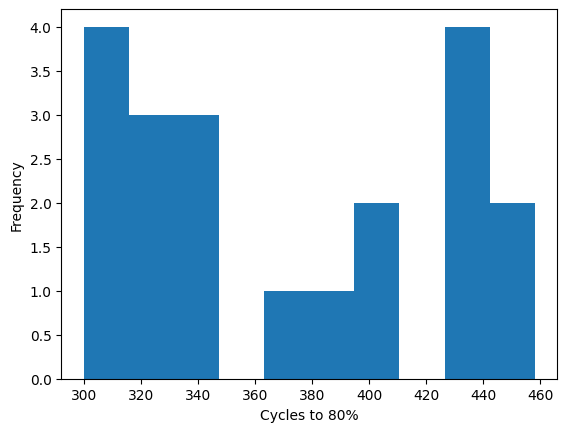

In [11]:
plt.hist(df1['cycles_to_80_pct'])
plt.xlabel('Cycles to 80%')
plt.ylabel('Frequency')
plt.show()

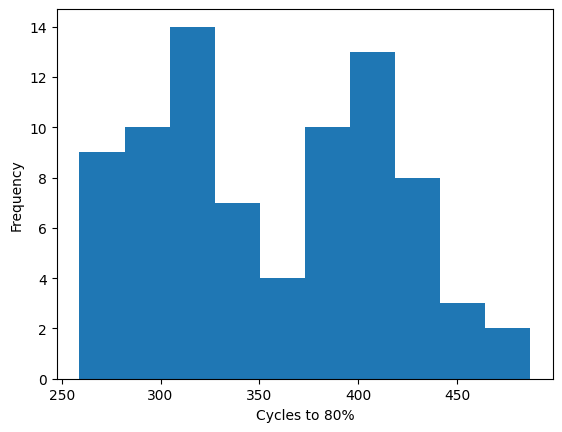

In [12]:
plt.hist(df2['cycles_to_80_pct'])
plt.xlabel('Cycles to 80%')
plt.ylabel('Frequency')
plt.show()

In [5]:
import smogn

rg_mtrx = [
    [360, 1, 0],  #oversampling
    [470, 1, 0],  #oversampling
    [310, 0, 1],  #undersampling
    [450, 1, 0]   #oversampling
]

smogn_data = smogn.smoter(
    data=df,
    y='cycles_to_80_pct',
    k=7,
    pert=0.005,  #controls the noise of the data generated. higher value results in more noise meaning it samples unlikely values as well- prevents overfitting
    samp_method='extreme',  
    drop_na_col=True,
    drop_na_row=True,
    replace=False,
    rel_thres=0.75, 
    rel_method='manual',
    rel_ctrl_pts_rg=rg_mtrx
)

print(smogn_data)


r_index: 100%|##########| 4/4 [00:00<00:00,  6.03it/s]


    is_room_temp_aging  is_baseline_formation  \
0                  0.0                      1   
1                  0.0                      1   
2                  0.0                      1   
3                  0.0                      1   
4                  0.0                      1   
..                 ...                    ...   
17                 1.0                      1   
18                 1.0                      1   
19                 1.0                      1   
20                 1.0                      1   
21                 1.0                      1   

    form_first_discharge_capacity_below_3p2v_ah  \
0                                      0.077820   
1                                      0.073791   
2                                      0.074725   
3                                      0.069433   
4                                      0.073127   
..                                          ...   
17                                     0.070153   
18 

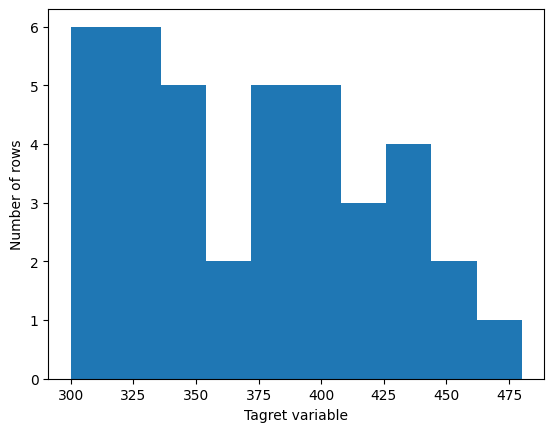

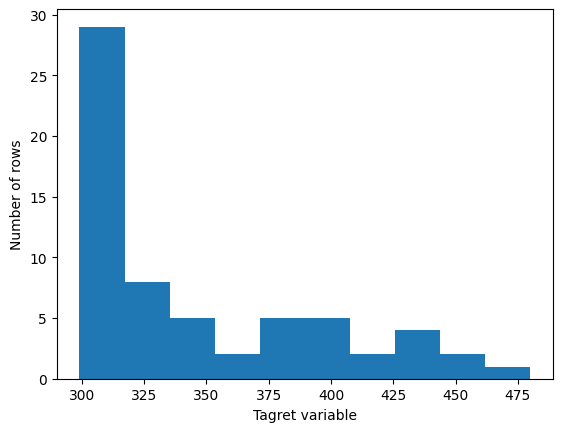

In [7]:
plt.hist(df['cycles_to_80_pct'])
plt.xlabel("Tagret variable")
plt.ylabel("Number of rows")
plt.show()
plt.hist(smogn_data['cycles_to_80_pct'])
plt.xlabel("Tagret variable")
plt.ylabel("Number of rows")
plt.show()

In [15]:
smogn_data.to_csv("corr_data_80_more.csv")